In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from skimage import io, color, measure

In [3]:
img = cv2.imread("python/grains2.jpg", 0)

In [4]:
pixels_to_um = 0.5

Text(0.5, 1.0, 'Histogram')

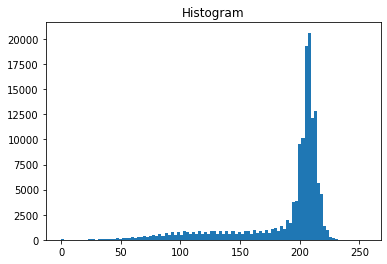

In [6]:
plt.hist(img.flat, bins=100, range=(0, 255))
plt.title("Histogram")

In [9]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

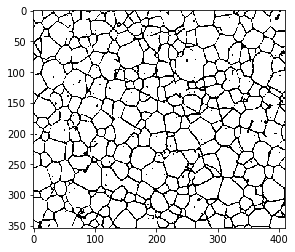

In [10]:
plt.imshow(thresh, cmap="gray")

In [16]:
kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)

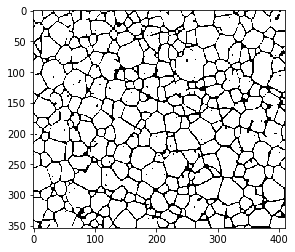

In [17]:
plt.imshow(dilated, cmap="gray")

In [18]:
mask = dilated == 255

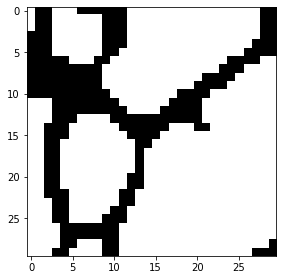

In [21]:
io.imshow(mask[250:280, 250:280])

In [22]:
s = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]

In [24]:
label_mask, num_labels = ndimage.label(mask, structure=s)

In [25]:
img2 = color.label2rgb(label_mask, bg_label=0)

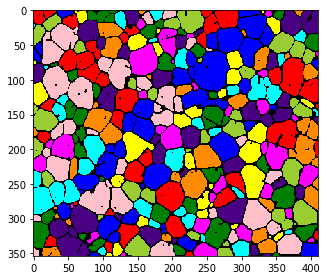

In [26]:
io.imshow(img2)

In [27]:
clusters = measure.regionprops(label_mask, img)

In [29]:
for prop in clusters:
    print("Label : {}, Area : {}".format(prop.label, prop.area))

Label : 1, Area : 415
Label : 2, Area : 187
Label : 3, Area : 221
Label : 4, Area : 12
Label : 5, Area : 524
Label : 6, Area : 327
Label : 7, Area : 48
Label : 8, Area : 212
Label : 9, Area : 198
Label : 10, Area : 1228
Label : 11, Area : 1479
Label : 12, Area : 221
Label : 13, Area : 15
Label : 14, Area : 84
Label : 15, Area : 153
Label : 16, Area : 1423
Label : 17, Area : 69
Label : 18, Area : 296
Label : 19, Area : 172
Label : 20, Area : 358
Label : 21, Area : 293
Label : 22, Area : 1304
Label : 23, Area : 321
Label : 24, Area : 123
Label : 25, Area : 418
Label : 26, Area : 847
Label : 27, Area : 589
Label : 28, Area : 18
Label : 29, Area : 999
Label : 30, Area : 345
Label : 31, Area : 159
Label : 32, Area : 1837
Label : 33, Area : 22
Label : 34, Area : 713
Label : 35, Area : 62
Label : 36, Area : 42
Label : 37, Area : 35
Label : 38, Area : 191
Label : 39, Area : 845
Label : 40, Area : 1114
Label : 41, Area : 120
Label : 42, Area : 278
Label : 43, Area : 453
Label : 44, Area : 40
La

In [30]:
propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    

In [33]:
output_file = open("image_measurements.csv", "w")

In [34]:
output_file.write((',' + ",".join(propList) + '\n'))

120

In [35]:
for clusters_props in clusters:
    output_file.write(str(clusters_props['Label']))
    for i, prop in enumerate(propList):
        if(prop == 'Area'):
            to_print = clusters_props[prop]*pixels_to_um**2
        elif(prop == 'orientation'):
            to_print = clusters_props[prop]*57.2958
        elif(prop.find('Intensity') < 0):
            to_print = clusters_props[prop]*pixels_to_um
        else:
            to_print = clusters_props[prop]
        output_file.write(',' + str(to_print))
    output_file.write('\n')